# Lab 2: Classification with PyTorch (Digits Dataset)

📘 THEORY: Classification vs. Regression

- Regression: Predicts continuous values (e.g., price, temperature).
- Classification: Predicts discrete labels (e.g., cat/dog, digit 0-9).

- In this lab, we perform **multiclass classification** (10 classes).

## SETUP: Import Libraries and Dataset

In [1]:
import torch # Import PyTorch library for tensor operations and deep learning 
import torch.nn as nn # Import neural network module from PyTorch for building models
import torch.optim as optim # Import optimization algorithms from PyTorch for training models
import matplotlib.pyplot as plt # Import Matplotlib for plotting graphs and visualizations
from sklearn.datasets import load_digits # Import the digits dataset from scikit-learn, which contains images of handwritten digits
from sklearn.model_selection import train_test_split # Import function to split the dataset into training and testing sets
from sklearn.preprocessing import StandardScaler # Import StandardScaler to normalize the features (images) for better model performance
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay # Import metrics for evaluating model performance, including accuracy and confusion matrix visualization

## Load digits dataset (images of 8x8 pixels representing digits 0-9)

X shape: (1797, 64), y shape: (1797,)


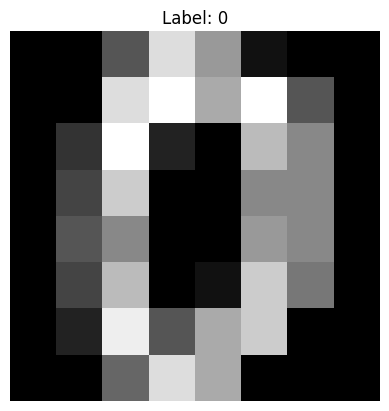

In [2]:
digits = load_digits()
X = digits.data  # shape: (1797, 64)
y = digits.target  # shape: (1797,)

print(f"X shape: {X.shape}, y shape: {y.shape}")

# Show the first image
plt.imshow(X[0].reshape(8, 8), cmap='gray')
plt.title(f"Label: {y[0]}")
plt.axis('off')
plt.show()

## Standardize features

In [3]:
# Standard Scaler is used to standarize the features to have mean=0 and variance=1, which helps in faster convergence during training.
# The intuation is that it normalizes the input data, making it easier for the model to learn patterns.
# It isnt necessary for all models, but it is a good practice for many machine learning algorithms.

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

## Convert to tensors to use with PyTorch 

In [4]:
# Convert features to float32 tensor
# Note: PyTorch uses float tensors for input features, as they represent continuous values.
X_tensor = torch.tensor(X_scaled, dtype=torch.float32) 

# Convert labels to long tensor (required for classification tasks)
# long tensor is used for classification tasks in PyTorch, as it represents class indices.
y_tensor = torch.tensor(y, dtype=torch.long)

## Split into training and test sets

- We split the dataset into training and test sets to evaluate the model's performance on unseen data.
- test_size=0.2 means 20% of the data will be used for testing
- random_state=42 to ensure that each time we run the code, we get the same split for reproducibility. For example, if you run the code multiple times, you will get the same training and test sets.
- stratify=y_tensor ensures that the class distribution is preserved in both training and test sets. In our case, it ensures that each digit (0-9) is represented in both sets.

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X_tensor, y_tensor, test_size=0.2, random_state=42, stratify=y_tensor)

## Buliding the Model from Scratch

torch.Size([1437, 64])
Epoch [5/100], Loss: 2.1591
Epoch [10/100], Loss: 1.9513
Epoch [15/100], Loss: 1.7490
Epoch [20/100], Loss: 1.5491
Epoch [25/100], Loss: 1.3532
Epoch [30/100], Loss: 1.1655
Epoch [35/100], Loss: 0.9923
Epoch [40/100], Loss: 0.8392
Epoch [45/100], Loss: 0.7087
Epoch [50/100], Loss: 0.6006
Epoch [55/100], Loss: 0.5124
Epoch [60/100], Loss: 0.4410
Epoch [65/100], Loss: 0.3834
Epoch [70/100], Loss: 0.3367
Epoch [75/100], Loss: 0.2985
Epoch [80/100], Loss: 0.2669
Epoch [85/100], Loss: 0.2404
Epoch [90/100], Loss: 0.2181
Epoch [95/100], Loss: 0.1989
Epoch [100/100], Loss: 0.1824


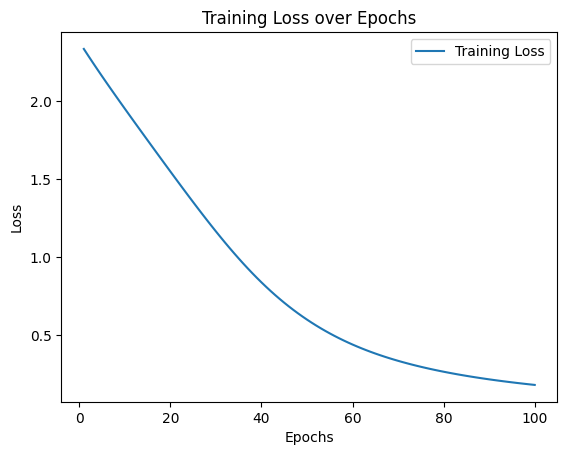

In [6]:
class MLP(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(MLP, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)  # First fully connected layer
        self.fc2 = nn.Linear(hidden_size, output_size)  # Second fully connected layer
        self.relu = nn.ReLU()  # Activation function

    def forward(self, x):
        x = self.fc1(x)  # Pass input through first layer
        x = self.relu(x)  # Apply ReLU activation
        x = self.fc2(x)  # Pass through second layer
        return x  # Output logits for each class
    

# Initialize the model, loss function, and optimizer
print(X_train.shape)
input_size = X_train.shape[1]  # Number of features (64 for 8x8 images)
hidden_size = 128  # Number of neurons in the hidden layer
output_size = 10  # Number of classes (digits 0-9)

model = MLP(input_size, hidden_size, output_size)  # Create an instance of the MLP model
criterion = nn.CrossEntropyLoss()  # Loss function for multi-class classification
optimizer = optim.Adam(model.parameters(), lr=0.001)  # Adam optimizer for training the model


# Training the model
losses = []  # List to store loss values for plotting
num_epochs = 100  # Number of epochs to train the model
for epoch in range(num_epochs):
    model.train()  # Set the model to training mode
    optimizer.zero_grad()  # Clear gradients from previous step
    outputs = model(X_train)  # Forward pass: compute predicted outputs by passing inputs to the model
    loss = criterion(outputs, y_train)  # Compute the loss
    loss.backward()  # Backward pass: compute gradients
    optimizer.step()  # Update model parameters
    losses.append(loss.item())  # Store the loss value for plotting

    if (epoch + 1) % 5 == 0:  # Print loss every 5 epochs
        print(f'Epoch [{epoch + 1}/{num_epochs}], Loss: {loss.item():.4f}')


# plotting the training loss
plt.plot(range(1, num_epochs + 1), losses, label='Training Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training Loss over Epochs')
plt.legend()
plt.show()

In [7]:
# Evaluating the model
model.eval()  # Set the model to evaluation mode
with torch.no_grad():  # Disable gradient computation for evaluation
    outputs = model(X_test)  # Forward pass: compute predicted outputs
    _, predicted = torch.max(outputs, 1)  # Get the predicted class labels
    accuracy = accuracy_score(y_test.numpy(), predicted.numpy())  # Calculate accuracy
print(f'Accuracy on test set: {accuracy * 100:.2f}%')

Accuracy on test set: 95.00%


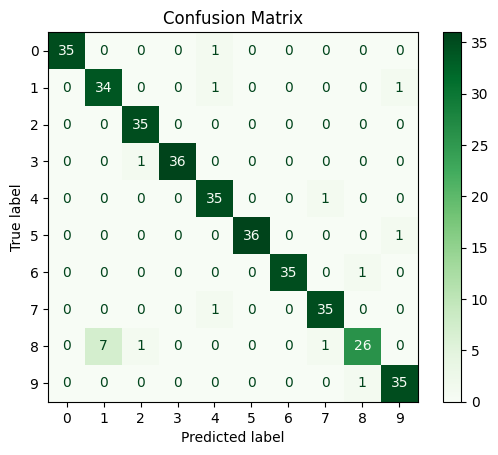

In [8]:
# confusion matrix
cm = confusion_matrix(y_test.numpy(), predicted.numpy())  # Compute confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=digits.target_names)
disp.plot(cmap=plt.cm.Greens)  # Plot confusion matrix
plt.title('Confusion Matrix')
plt.show()  # Show the plot


## Training Using nn.Sequential (Trainer Style)

In [9]:
model2 = nn.Sequential(
    nn.Linear(X_tensor.shape[1], 32), # First fully connected layer with 64 input features and 32 output features
    nn.ReLU(), # Activation function to introduce non-linearity 
    nn.Dropout(0.2), # Dropout layer to prevent overfitting
    nn.Linear(32, 10)
)


<b><span style="color: orange">Notes</span></b>


- Overfitting occurs when a model learns the training data too well, including its noise and outliers, leading to poor generalization on unseen data.
- It can be mitigated by techniques such as dropout, regularization, and early stopping.
-  Overfitting can be detected by monitoring the training and validation loss during training. If the training loss decreases while the validation loss increases, it indicates overfitting.
- The intuition behind dropout is to randomly set a fraction of the input units to zero during training, which helps prevent overfitting by reducing the model's reliance on specific neurons.

- Underfitting occurs when a model is too simple to capture the underlying patterns in the data, leading to poor performance on both training and validation sets.
- It can be mitigated by increasing model complexity, adding more features, or using more advanced models.
- Underfitting can be detected by observing high training and validation loss, indicating that the model is not learning the data well.

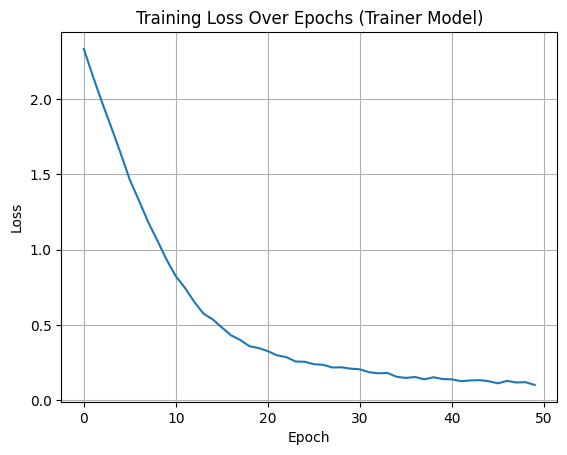

Test Accuracy (Trainer): 0.9306


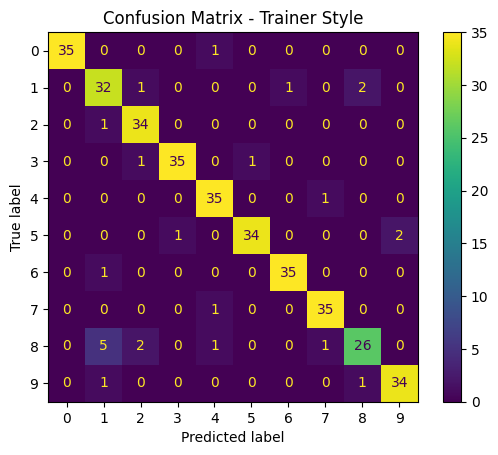

In [10]:
criterion2 = nn.CrossEntropyLoss()
optimizer2 = optim.Adam(model2.parameters(), lr=0.01)

# Training
losses2 = []
for epoch in range(50):
    optimizer2.zero_grad()
    out = model2(X_train)
    loss2 = criterion2(out, y_train)
    loss2.backward()
    optimizer2.step()
    losses2.append(loss2.item())

# Plot
plt.plot(losses2)
plt.title("Training Loss Over Epochs (Trainer Model)")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.grid(True)
plt.show()

# ===============================================================
# 📊 Evaluate Trainer Model
# ===============================================================
with torch.no_grad():
    preds = model2(X_test)
    predicted2 = torch.argmax(preds, dim=1)
    acc2 = accuracy_score(y_test, predicted2)
    print(f"Test Accuracy (Trainer): {acc2:.4f}")

ConfusionMatrixDisplay.from_predictions(y_test, predicted2)
plt.title("Confusion Matrix - Trainer Style")
plt.show()

## Classwork Questions

1. Try increasing the number of training epochs to 100. Does accuracy improve?
2. Replace ReLU with Tanh. How does it affect performance?
3. What if we reduce hidden layer size from 32 to 8?
4. Try changing the optimizer to SGD and rerun training.
5. Add another hidden layer and test performance.